<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Magic_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@nitin.data1997/the-magic-of-k-means-clustering-a-comprehensive-exploration-with-penguins-75d299b388d7

https://stackoverflow.com/questions/66793419/fit-vs-fit-predict-metthods-in-sklearn-kmeans

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the penguins dataset
penguins = sns.load_dataset('penguins')
# Display the first few rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


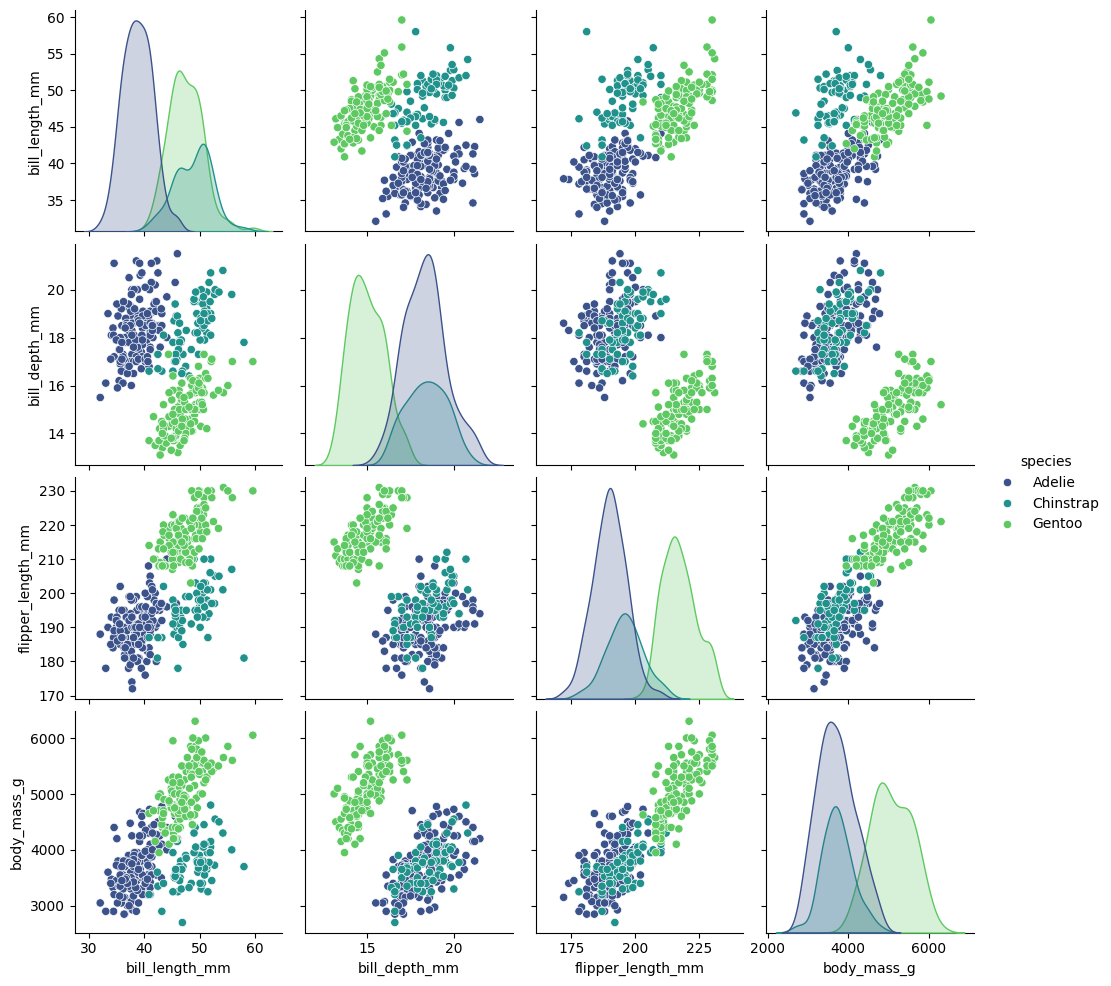

In [2]:
# Pairplot to visualize relationships between features
sns.pairplot(penguins, hue='species', palette='viridis')
plt.show()

In [3]:
# Drop rows with missing values
penguins_cleaned = penguins.dropna()

# Select relevant features
features = ['bill_length_mm', 'flipper_length_mm']
X = penguins_cleaned[features]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

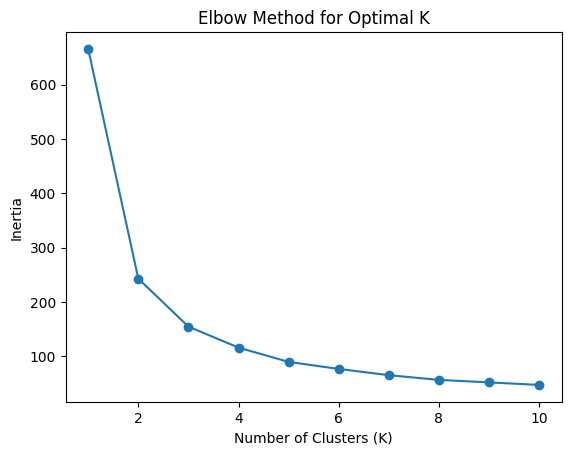

In [5]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [6]:
# Choosing K=3 based on the Elbow Method
kmeans_final = KMeans(n_clusters=3, random_state=42)
penguins_cleaned['cluster'] = kmeans_final.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-7f72f9fca4a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_cleaned['cluster'] = kmeans_final.fit_predict(X_scaled)


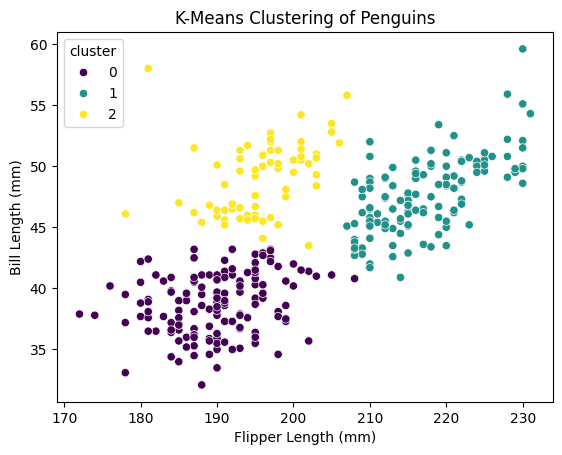

In [7]:
# Visualizing the clusters
sns.scatterplot(x='flipper_length_mm', y='bill_length_mm', hue='cluster', data=penguins_cleaned, palette='viridis')
plt.title('K-Means Clustering of Penguins')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.show()

In [8]:
# Grouping by cluster and calculating mean values
cluster_means = penguins_cleaned.groupby('cluster')[['bill_length_mm', 'flipper_length_mm']].mean()

print(cluster_means)

         bill_length_mm  flipper_length_mm
cluster                                   
0             38.727397         189.698630
1             47.618699         217.073171
2             49.035938         195.718750
